In [1]:
# Author: Jiaxin Yang
# Date: 01/24/23
# COMP664 - Homework2

# 1. Logistic Regression for Binary Classification (1.5 points)

In softmax regression, the model's output probabilities are given by

$$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1. Show that this parametrization has a spurious degree of freedom. That is, show that both $\mathbf{o}$ and $\mathbf{o} + c$ with $c \in \mathbb{R}$ lead to the same probability estimate.

2. For binary classification, i.e. whenever we have only two classes $\{-1, 1\}$, we can arbitrarily set $o_{-1} = 0$. Using the shorthand $o = o_1$ show that this is equivalent to 

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}$$

3. Show that the log-likelihood loss (often called logistic loss) for labels $y \in \{-1, 1\}$ is thus given by 

$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

4. Show that for $y = 1$ the logistic loss asymptotes to $0$ for $o \to \infty$ and to $\infty$ for $o \to -\infty$. 





*   Q1.1: $$p(y|o+c)={exp(o_y+c) \over \sum_{y'}exp(o_{y'}+c)}=  {e^{c}exp(o_y) \over e^{c}\sum_{y'}exp(o_{y'})}={exp(o_y) \over \sum_{y'}exp(o_{y'})}$$





*   Q1.2: $$p(y=1|o)=p(y=1|o_{-1}=0, o_{1}=o)={exp(o_{1}) \over {exp(o_{-1})+exp(o_{1})}}={exp(o_{1}) \over {1+exp(o_{1})}}={1 \over {(1+exp(o_{1})) \times exp(-o_{1})}}={1 \over {1+exp(-o_{1})}}={1 \over {1+exp(-o)}}$$





*   Q1.3: 
From Q1.2, we can get to know that $$p(y=1|o)={1 \over {1+exp(-o)}}$$
Based on that we can also get &rarr; $$p(y=-1|o)=1-{1 \over {1+exp(-o)}}={{1+exp(-o)} \over {1+exp(-o)}}-{1 \over {1+exp(-o)}}={exp(-o) \over {1+exp(-o)}}={1 \over {1+exp(o)}}$$
Then &rarr; $$p(y|o)={1 \over {1+exp(-y⋅o)}}$$
Thus, $$-\log p(y|o)=-log({1 \over {1+exp(-y⋅o)}})=-(log(1)-log(1+exp(-y \cdot o)))=log(1+exp(-y \cdot o))$$





*   Q1.4: From Q1.3 and $y=1$ 
  * $o \to \infty : \infty log(1+exp(-o))=log(1+\lim_{o \to \infty}exp(-o))=log(1+{\lim_{o \to \infty}1 \over \lim_{o \to \infty}exp(o)})=log(1+{1 \over ∞})=log(1)=0$
  * $o \to -\infty : -\infty log(1+exp(-o))=log(1+\lim_{o \to -\infty}exp(-o))=log(1+\lim_{o \to \infty}exp(o))=log(\infty)=\infty$



# 2. Implementing the logistic loss (1 point)

1. Implement the binary logistic loss $l(y,o) = \log (1 + \exp(-y \cdot o))$ in numpy.
1. Plot its values for $y \in \{-1, 1\}$ over the range of $o \in [-5, 5]$.
1. Derive the derivative of $l(y,o)$ and show your work. Then, in a new plot, plot derivative of $l(y,o)$ with respect to $o$ for $y \in \{-1, 1\}$ and for $o \in [-5, 5]$ without using any automatic differentiation software (e.g. Pytorch, TensorFlow, JAX, etc.).
1. In a new plot, plot $l(y,o)$ with $y = 1$ and $o ∈ [-1000, 1000]$. What happens for large positive and large negative values of $o$? Why?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import warnings

#suppress warnings
warnings.filterwarnings('ignore')

In [3]:
# Q2.1
def logistic_loss(y, o):
  return np.log(1+np.exp(-y*o))

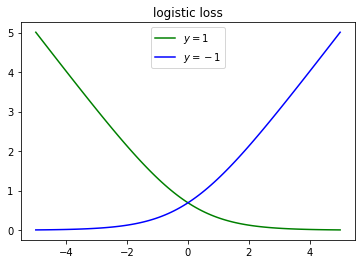

In [4]:
# Q2.2
o = np.linspace(-5, 5, 100)

plt.title("logistic loss")
plt.plot(o, logistic_loss(1.0, o), color='g', label="$y=1$")
plt.plot(o, logistic_loss(-1.0, o), color='b', label="$y=-1$")
plt.legend()
plt.show()

In [5]:
# Q2.3
def loss_derivative(y, o):
  return -y/(np.exp(y*o)+1)

$${∂l \over ∂o}={1 \over 1+exp(-y \cdot o)} \cdot exp(-y*o) \cdot -y = {-y \cdot exop(-y \cdot o) \over 1+exp(-y \cdot o)}={-y \over 1+exp(y \cdot o)}$$

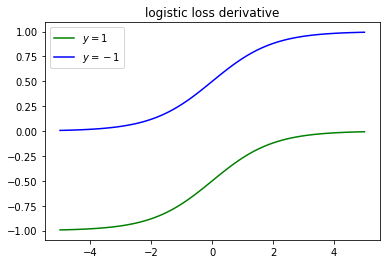

In [6]:
plt.title("logistic loss derivative")
plt.plot(o, loss_derivative(1.0, o), color='g', label="$y=1$")
plt.plot(o, loss_derivative(-1.0, o), color='b', label="$y=-1$")
plt.legend()
plt.show()

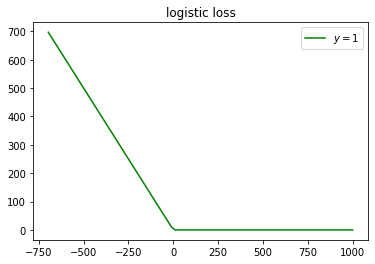

In [7]:
# Q2.4
o = np.linspace(-1000, 1000, 100)

plt.title("logistic loss")
plt.plot(o, logistic_loss(1.0, o), color='g', label="$y=1$")
plt.legend()
plt.show()



*   In the previous steps, we have proved that the binary logistic loss will be infinite when the value O tends to negative infinity. And when the value of O tends to positive infinity, the binary logistic loss will be 0. This is becasue that the exponential function is an increasing function which has a very steep slope for large positive values and very small slope for large negative values.



# 3. Implementing logistic regression (1.5 points)

Implement a basic logistic regression model and fit it to the data from the new `generate_data` function (below) using gradient descent.
Your model should take the form `o = m*x + b`, where `o` is the output (logits), `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
Train the model using the logistic loss function you derived in the previous problem.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
Print out or plot the loss over the course of training.
You should be able to get a loss that is close to zero by the end of training - make sure you achieve this and **explain why**.

In [8]:
def generate_data():
    size = 1000
    rng = np.random.default_rng(seed=0)
    y = 2*rng.integers(0, 2, size) - 1
    x = rng.standard_normal((1000,)) + 4*y
    return x, y

In [9]:
# Data
x, y = generate_data()

In [10]:
def gradientDescent(x, y, m, b, learn_rate, n_iter):
    loss_i = np.zeros(n_iter)
    for i in range(n_iter):
        o = m*x+b
        loss = np.sum(logistic_loss(y,o))/len(x)
        loss_i[i] = loss
        derivative = loss_derivative(y, o)
        #print("i:%d, loss: %f" % (i, loss))

        gradient_m = np.dot(x,derivative)/len(x)
        gradient_b = np.sum(derivative)/len(x)
        m = m - learn_rate*gradient_m
        b = b - learn_rate*gradient_b
    return m,b,loss_i

In [11]:
m,b,loss = gradientDescent(x,y, m=0, b=0, learn_rate=0.01, n_iter=10000)

In [12]:
loss[-1]

0.0016337196552107273

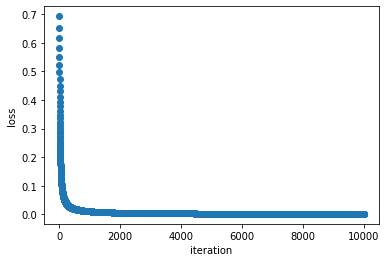

In [13]:
# Plot the loss over interations
epoch = range(len(loss))
plt.plot(epoch,loss,'o')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()



*   From the plot, we can find that the loss is close to zero by the end of training. That is because that over the course of training, the parameters get much closer to the optimal values which also minimize the loss function.

